# Heart Disease
### Dataset is hosted on __[Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci)__
#### The goal is to predict heart disease status from patient data

#### Import necessary libraries

In [115]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
#from sklearn_pandas import DataFrameMapper

In [2]:
data = pd.read_csv('../heart.csv')

#### Check basic dataframe information: Columns, data types, number of samples

In [3]:
data.shape

(303, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


#### There are no null values. 
#### Check for duplicate entries. 

In [5]:
data[data.duplicated().values]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


#### Remove the duplicate

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.shape

(302, 14)

#### Check summary statistics to get idea of feature scales and deviation

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Show data distribution and check for outliers

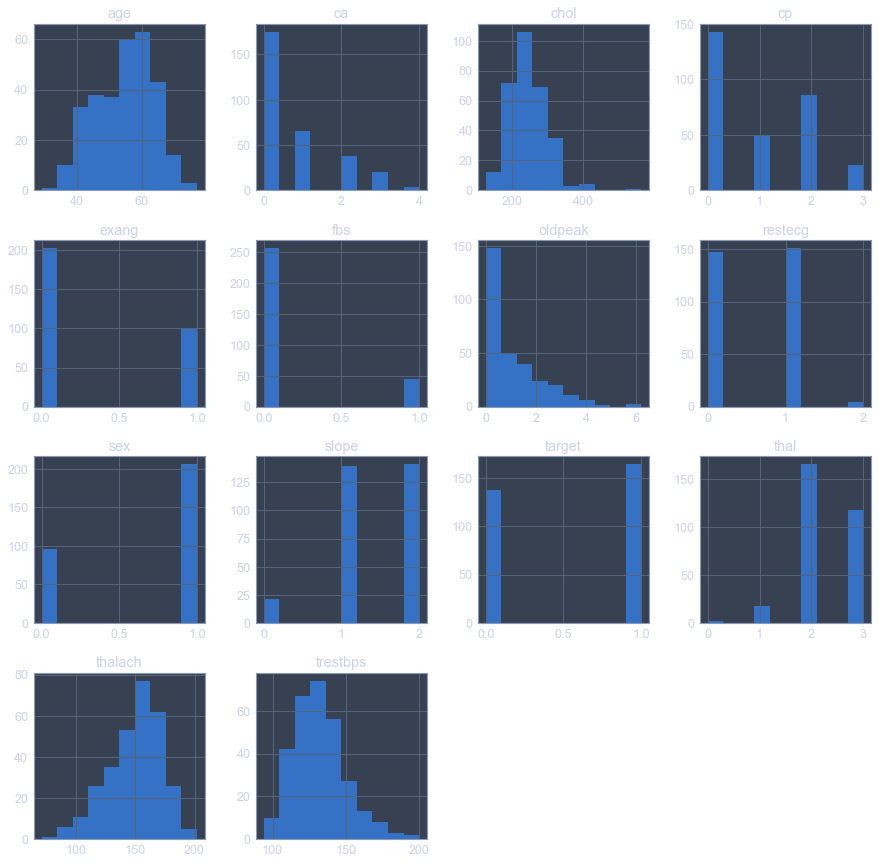

In [9]:
data.hist(figsize = (15,15));

#### Possible high value outliers in chol and oldpeak. Investigate and see if row or value should be removed or not. 

In [10]:
data.nlargest(10, 'chol')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0


In [11]:
data.nlargest(10, 'oldpeak')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0


#### Neither of the potential outliers contains invalid data values. However, the high cholesterol individual is  well separated from the next highest, and also contains an unusually low trestbps value, so may be worth removing. 

In [40]:
data = data[data['chol'] != data['chol'].max()]

#### Correlation heatmap to show which features are most correlated or anti-correlated to heart disease ('target)
#### Spearman (rank) correlation is used, since many of the features are categorical

In [50]:
raw_corr_sp = data.corr(method = 'spearman')

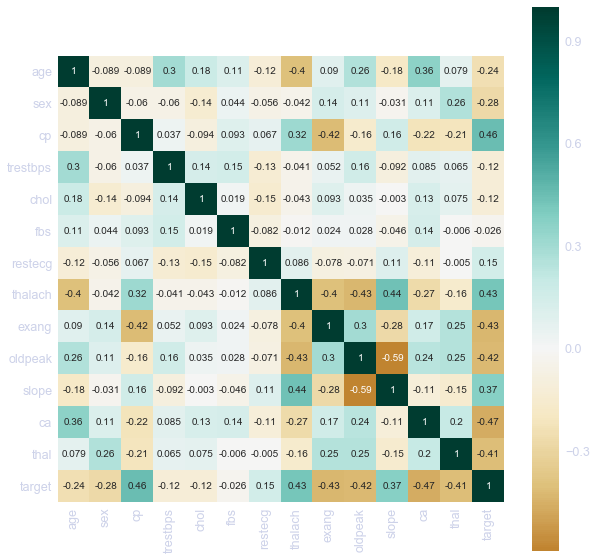

In [59]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(raw_corr_sp, square = True, cmap = 'BrBG', annot=True, center=0)

#### Most correlated: cp, thalach, slope // anti-correlated: ca, exang, oldpeak, thal
#### Also note, slope and oldpeak are anti-correlated. Slope is a categorization of oldpeak; one of these features may be removed to reduce redundancy.

#### Alternate feature comparison: Violinplot comparison of disease state for each feature. (Due to categorical features, it is helpful to see the density estimates). 

In [113]:
melted = pd.melt(data, id_vars =['target'], var_name = 'feature', value_name = 'value')

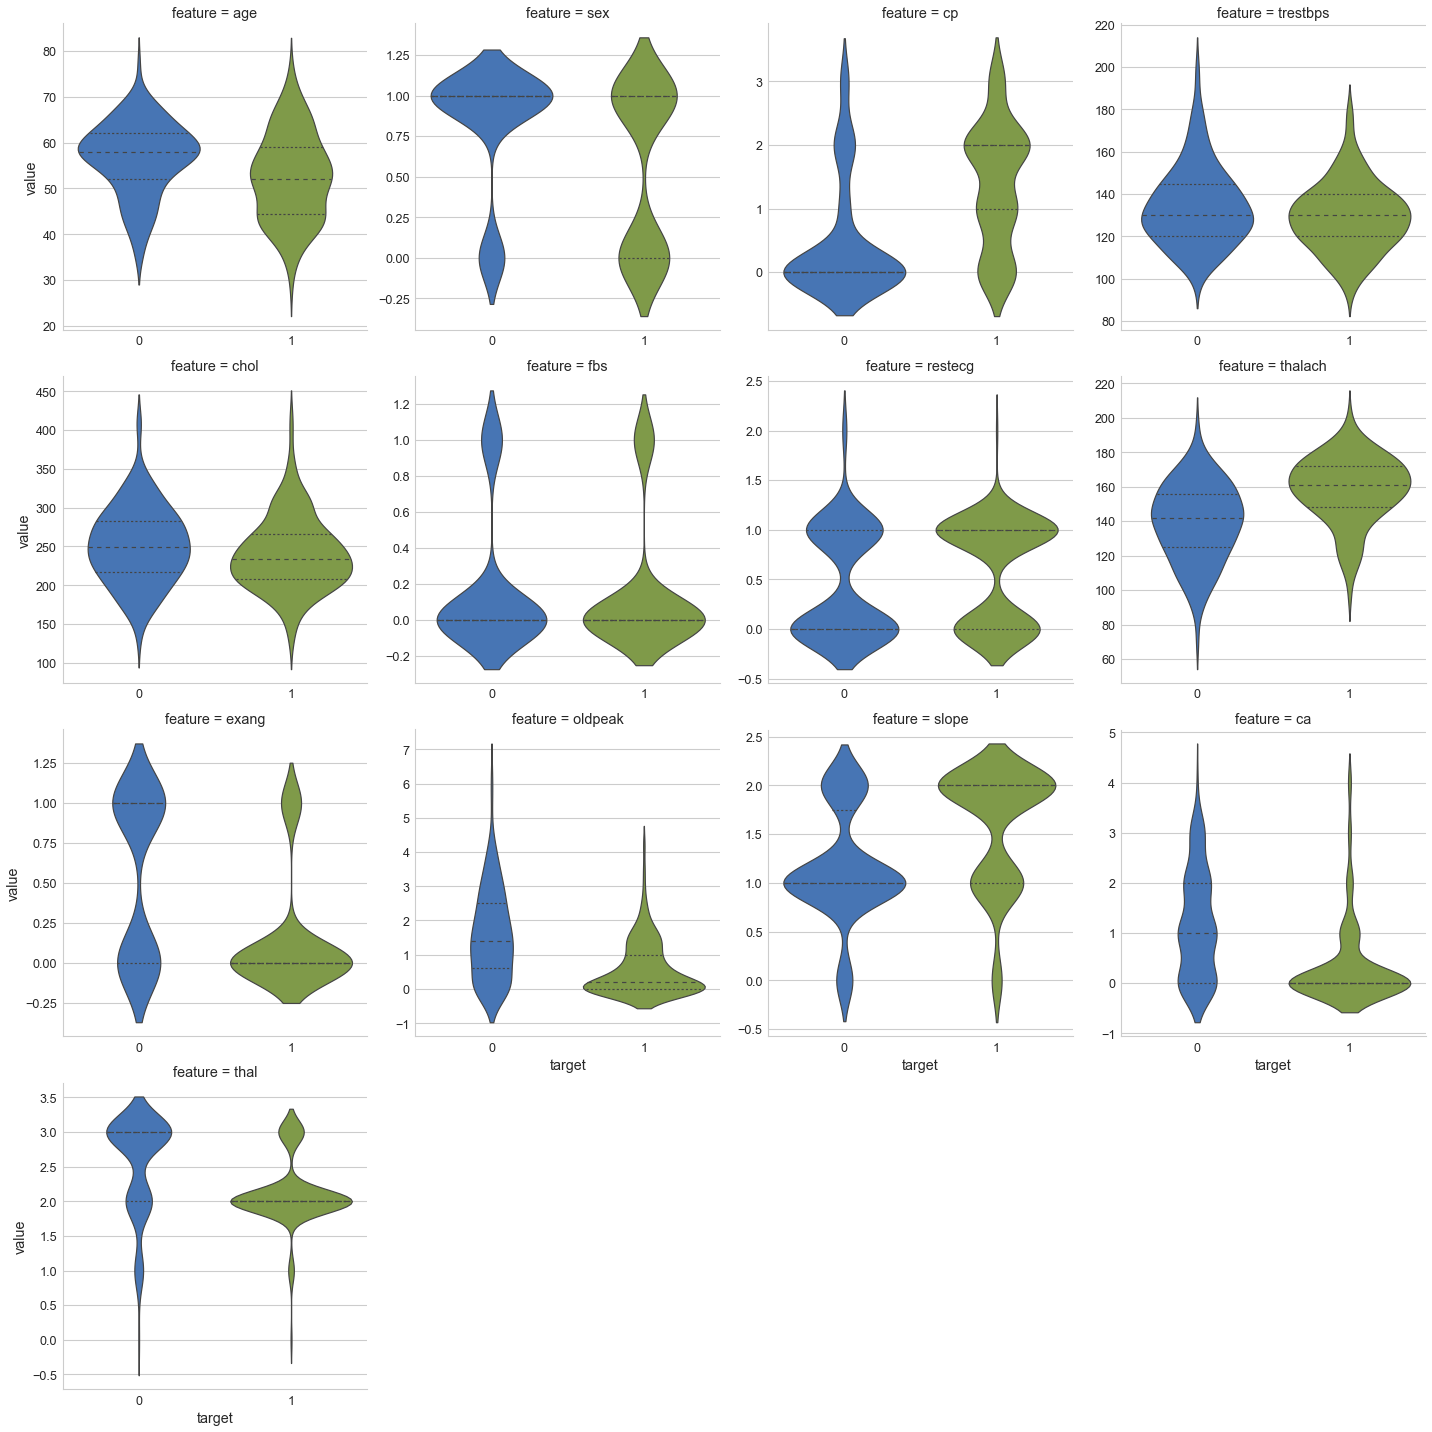

In [114]:
sns.set_style('whitegrid')
sns.catplot(x = 'target', y = 'value', col = 'feature', data = melted, col_wrap = 4,
            sharey = False, sharex = False, kind = 'violin', inner = 'quartiles');

## Normalize 



In [117]:
categorical = ['cp', 'restecg', 'slope', 'ca', 'thal']
binary_cat = ['sex', 'fbs', 'exang','target']
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [160]:
cat_transform = preprocessing.OneHotEncoder(categories = 'auto', sparse = False)
cat_transform2 = preprocessing.MultiLabelBinarizer()
num_transform = preprocessing.StandardScaler()

In [163]:
preprocess = ColumnTransformer(transformers=[('cat', cat_transform2, categorical),
                                             ('num', num_transform, numerical)])

In [164]:
processed_data = preprocess.fit_transform(data)

TypeError: fit_transform() takes 2 positional arguments but 3 were given

In [157]:
processed_data[]

array([ 0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.29046364,  0.47839125, -1.04867848,
       -0.07201822, -0.55178349])

## Normalize continuous data (z-score) and one hot encode categorical 

In [216]:
#LB = preprocessing.LabelBinarizer()
SS = preprocessing.StandardScaler()
OH = preprocessing.OneHotEncoder(categories = 'auto', sparse=False)
mapper = DataFrameMapper([(['age'], SS), (['sex'], OH), (['cp'], OH), (['trestbps'], SS), (['chol'], SS),
                          (['fbs'], OH), (['restecg'], OH), (['thalach'], SS), (['exang'], OH), (['oldpeak'], SS),
                          (['slope'], OH),(['ca'], OH), (['thal'], OH), (['target'], OH)], df_out=True)

In [217]:
norm_data = mapper.fit_transform(data)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by Stand

## Encountered the Curse of Dimensionality

In [218]:
norm_data.shape

(303, 32)

In [219]:
norm_data.columns

Index(['age', 'sex_x0_0', 'sex_x0_1', 'cp_x0_0', 'cp_x0_1', 'cp_x0_2',
       'cp_x0_3', 'trestbps', 'chol', 'fbs_x0_0', 'fbs_x0_1', 'restecg_x0_0',
       'restecg_x0_1', 'restecg_x0_2', 'thalach', 'exang_x0_0', 'exang_x0_1',
       'oldpeak', 'slope_x0_0', 'slope_x0_1', 'slope_x0_2', 'ca_x0_0',
       'ca_x0_1', 'ca_x0_2', 'ca_x0_3', 'ca_x0_4', 'thal_x0_0', 'thal_x0_1',
       'thal_x0_2', 'thal_x0_3', 'target_x0_0', 'target_x0_1'],
      dtype='object')

In [220]:
norm_corr = norm_data.corr()

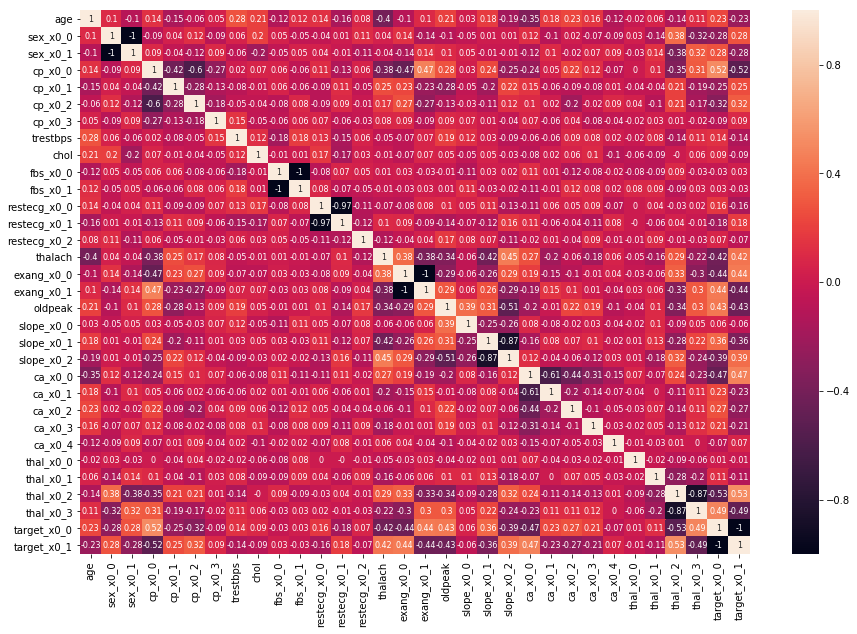

In [221]:
plt.figure(figsize = (15,10))
ax = sns.heatmap(round(norm_corr, 2), annot=True, annot_kws = {'size' : 8});

In [ ]:
plt.figure(figsize = (15,10))
ax = sns.heatmap(round(norm_corr, 2), annot=True, annot_kws = {'size' : 8});

In [222]:
norm_data.head()

,age,sex_x0_0,sex_x0_1,cp_x0_0,cp_x0_1,cp_x0_2,cp_x0_3,trestbps,chol,fbs_x0_0,...,ca_x0_1,ca_x0_2,ca_x0_3,ca_x0_4,thal_x0_0,thal_x0_1,thal_x0_2,thal_x0_3,target_x0_0,target_x0_1
0,0.952197,0.0,1.0,0.0,0.0,0.0,1.0,0.763956,-0.256334,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.915313,0.0,1.0,0.0,0.0,1.0,0.0,-0.092738,0.072199,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-1.474158,1.0,0.0,0.0,1.0,0.0,0.0,-0.092738,-0.816773,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.180175,0.0,1.0,0.0,1.0,0.0,0.0,-0.663867,-0.198357,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.290464,1.0,0.0,1.0,0.0,0.0,0.0,-0.663867,2.082050,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [223]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
